## Loading data as a table

We provide an example based on the Weinstock et al 2016 data. However, the same procedure applies to all other datasets. All the pre-porcessing parameters must be specified in the `yaml` configuration file in the `config/` folder. 

In [1]:
import yaml
from data_formatter.base import DataFormatter

In [2]:
import yaml
from data_formatter.base import DataFormatter

# load config file
dataset = 'iglu'
with open(f'./config/{dataset}.yaml', 'r') as f:
    config = yaml.safe_load(f)
# create data formatter: loads the data and performs the pre-processing
formatter = DataFormatter(config)

--------------------------------
Loading column definition...
Checking column definition...
Loading data...
Dropping columns / rows...
Checking for NA values...
Setting data types...
Dropping columns / rows...
Encoding data...
	Updated column definition:
		id: REAL_VALUED (ID)
		time: DATE (TIME)
		gl: REAL_VALUED (TARGET)
		time_year: REAL_VALUED (KNOWN_INPUT)
		time_month: REAL_VALUED (KNOWN_INPUT)
		time_day: REAL_VALUED (KNOWN_INPUT)
		time_hour: REAL_VALUED (KNOWN_INPUT)
		time_minute: REAL_VALUED (KNOWN_INPUT)
		time_second: REAL_VALUED (KNOWN_INPUT)
Interpolating data...
	Dropped segments: 17
	Extracted segments: 15
	Interpolated values: 561
	Percent of values interpolated: 4.37%
Splitting data...
	Train: 9056 (64.79%)
	Val: 1774 (12.69%)
	Test: 1848 (13.22%)
	Test OOD: 1300 (9.30%)
Scaling data...
	No scaling applied
Data formatting complete.
--------------------------------


Once the data is loaded and pre-processed, we can access the underlying tables via the following set of commands. 

In [4]:
id_test = formatter.test_data.loc[~formatter.test_data.index.isin(formatter.test_idx_ood)]
for segment_id in id_test['id_segment'].unique():
    current_segment = id_test[id_test['id_segment'] == segment_id]
    print(current_segment['time'].to_list()[0])
    
    

2015-06-17 07:05:00
2015-03-11 21:43:00
2015-03-24 22:07:00
2015-03-09 10:05:00


In [5]:
# train data, scaled
formatter.train_data

time   id     gl  time_year  time_month  time_day  \
0     2015-06-10 22:40:00  0.0  140.0     2015.0         6.0      10.0   
1     2015-06-10 22:45:00  0.0  142.0     2015.0         6.0      10.0   
2     2015-06-10 22:50:00  0.0  138.0     2015.0         6.0      10.0   
3     2015-06-10 22:55:00  0.0  135.0     2015.0         6.0      10.0   
4     2015-06-10 23:00:00  0.0  136.0     2015.0         6.0      10.0   
...                   ...  ...    ...        ...         ...       ...   
12029 2015-03-08 11:10:00  4.0  311.0     2015.0         3.0       8.0   
12030 2015-03-08 11:15:00  4.0  308.0     2015.0         3.0       8.0   
12031 2015-03-08 11:20:00  4.0  303.0     2015.0         3.0       8.0   
12032 2015-03-08 11:25:00  4.0  296.0     2015.0         3.0       8.0   
12033 2015-03-08 11:30:00  4.0  287.0     2015.0         3.0       8.0   

       time_hour  time_minute  time_second  id_segment  
0           22.0         40.0         13.0           0  
1           22.0         45.0         10.0           0  
2           22.0         50.0         10.0           0  
3           22.0         55.0         10.0           0  
4           23.0          0.0         10.0           0  
...          ...          ...          ...         ...  
12029       11.0          9.0         38.0          13  
12030       11.0         14.0         38.0          13  
12031       11.0         19.0         38.0          13  
12032       11.0         24.0         38.0          13  
12033       11.0         29.0         38.0          13  

[9056 rows x 10 columns]

In [5]:
# out-of-distribution test data, scaled
formatter.test_data[formatter.test_data.index.isin(formatter.test_idx_ood)]

time     id          gl  Height  Weight  Gender  Race  \
15889  1900-01-04 12:07:00    5.0  239.000000    76.0   190.0     1.0   4.0   
15890  1900-01-04 12:12:00    5.0  239.000000    76.0   190.0     1.0   4.0   
15891  1900-01-04 12:17:00    5.0  237.000000    76.0   190.0     1.0   4.0   
15892  1900-01-04 12:22:00    5.0  236.000000    76.0   190.0     1.0   4.0   
15893  1900-01-04 12:27:00    5.0  234.000000    76.0   190.0     1.0   4.0   
...                    ...    ...         ...     ...     ...     ...   ...   
520419 1900-01-15 12:57:00  176.0  120.599998    65.0   151.0     0.0   4.0   
520420 1900-01-15 13:02:00  176.0  133.399994    65.0   151.0     0.0   4.0   
520421 1900-01-15 13:07:00  176.0  145.399994    65.0   151.0     0.0   4.0   
520422 1900-01-15 13:12:00  176.0  157.000000    65.0   151.0     0.0   4.0   
520423 1900-01-15 13:17:00  176.0  166.399994    65.0   151.0     0.0   4.0   

        EduLevel  AnnualInc  MaritalStatus  ...  \
15889        8.0        7.0            2.0  ...   
15890        8.0        7.0            2.0  ...   
15891        8.0        7.0            2.0  ...   
15892        8.0        7.0            2.0  ...   
15893        8.0        7.0            2.0  ...   
...          ...        ...            ...  ...   
520419       5.0        1.0            2.0  ...   
520420       5.0        1.0            2.0  ...   
520421       5.0        1.0            2.0  ...   
520422       5.0        1.0            2.0  ...   
520423       5.0        1.0            2.0  ...   

        Proliferative diabetic retinopathy  Hypercholesterolemia  \
15889                                  0.0                   0.0   
15890                                  0.0                   0.0   
15891                                  0.0                   0.0   
15892                                  0.0                   0.0   
15893                                  0.0                   0.0   
...                                    ...                   ...   
520419                                 0.0                   0.0   
520420                                 0.0                   0.0   
520421                                 0.0                   0.0   
520422                                 0.0                   0.0   
520423                                 0.0                   0.0   

        Erectile dysfunction  Type I diabetes mellitus  time_year  time_month  \
15889                    0.0                       0.0     1900.0         1.0   
15890                    0.0                       0.0     1900.0         1.0   
15891                    0.0                       0.0     1900.0         1.0   
15892                    0.0                       0.0     1900.0         1.0   
15893                    0.0                       0.0     1900.0         1.0   
...                      ...                       ...        ...         ...   
520419                   0.0                       0.0     1900.0         1.0   
520420                   0.0                       0.0     1900.0         1.0   
520421                   0.0                       0.0     1900.0         1.0   
520422                   0.0                       0.0     1900.0         1.0   
520423                   0.0                       0.0     1900.0         1.0   

        time_day  time_hour  time_minute  id_segment  
15889        4.0       12.0          6.0          18  
15890        4.0       12.0         11.0          18  
15891        4.0       12.0         16.0          18  
15892        4.0       12.0         21.0          18  
15893        4.0       12.0         26.0          18  
...          ...        ...          ...         ...  
520419      15.0       12.2         45.0         609  
520420      15.0       13.0          2.0         609  
520421      15.0       13.0          7.0         609  
520422      15.0       13.0         12.0         609  
520423      15.0       13.0         17.0         609  

[58048 ro

## Converting to a Dataset class (for training with PyTorch-based models)

Two important points that have to be decided before Pytorch Dataset object can be instatiated are: (1) how to sample input-output pairs from the data, (2) what covariates to pass to the model. 

For point (1), we set model input length and output length in the `yaml` configuration file. The input-output pairs are then sampled during training using `get_valid_sampling_locations()` function in `utils/darts_dataset.py`, which first locates all possible input-output pairs and then samples from uniformly with the total number of samples controlled by `max_samples_per_ts` parameter for each model (this parameter is optimized via Optuna and should, intuitivbely, control overfitting). 

For point (2), we take inspiration from the Darts library and provide three options: (1) only past covariates (`SamplingDatasetPast`), (2) only future-known covariates (`SamplingDatasetDual`), (3) both past and future-known covariates (`SamplingDatasetMixed`).

In [6]:
import matplotlib.pyplot as plt

from utils.darts_processing import load_data
from utils.darts_dataset import SamplingDatasetPast

In [7]:
# converts table to Darts series
dataset = 'weinstock'
formatter, series, scalers = load_data(seed=0,
                                       dataset=dataset,
                                       use_covs=True, 
                                       cov_type='past',
                                       use_static_covs=True)

--------------------------------
Loading column definition...
Checking column definition...
Loading data...
Dropping columns / rows...
Checking for NA values...
Setting data types...
Dropping columns / rows...
Encoding data...
	Updated column definition:
		id: REAL_VALUED (ID)
		time: DATE (TIME)
		gl: REAL_VALUED (TARGET)
		Height: REAL_VALUED (STATIC_INPUT)
		Weight: REAL_VALUED (STATIC_INPUT)
		Gender: REAL_VALUED (STATIC_INPUT)
		Race: REAL_VALUED (STATIC_INPUT)
		EduLevel: REAL_VALUED (STATIC_INPUT)
		AnnualInc: REAL_VALUED (STATIC_INPUT)
		MaritalStatus: REAL_VALUED (STATIC_INPUT)
		DaysWkEx: REAL_VALUED (STATIC_INPUT)
		DaysWkDrinkAlc: REAL_VALUED (STATIC_INPUT)
		DaysMonBingeAlc: REAL_VALUED (STATIC_INPUT)
		T1DDiagAge: REAL_VALUED (STATIC_INPUT)
		NumHospDKA: REAL_VALUED (STATIC_INPUT)
		NumSHSinceT1DDiag: REAL_VALUED (STATIC_INPUT)
		InsDeliveryMethod: REAL_VALUED (STATIC_INPUT)
		UnitsInsTotal: REAL_VALUED (STATIC_INPUT)
		NumMeterCheckDay: REAL_VALUED (STATIC_INPUT)
		Aspir

In [8]:
# data is split
series.keys()

dict_keys(['train', 'val', 'test', 'test_ood'])

In [9]:
# there are target (glucose), static, dynamic (past-known), and future-known covariates
series['train'].keys()

dict_keys(['target', 'static', 'dynamic', 'future'])

<Axes: xlabel='time'>

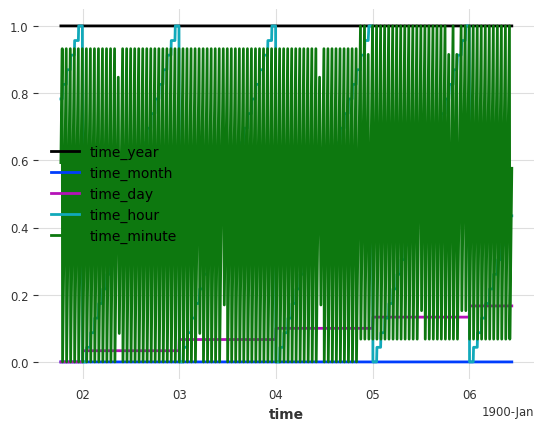

In [10]:
# since we specified to include only past (cov_type = 'past'), future-known covariates are None
# since we specified to include static (use_static_covs = True), static covariates are attached to the target series
series['train']['future'] == None # returns True
series['train']['dynamic'][0].plot() # returns plot of past covariates (first contiguous segment)

<Axes: xlabel='time'>

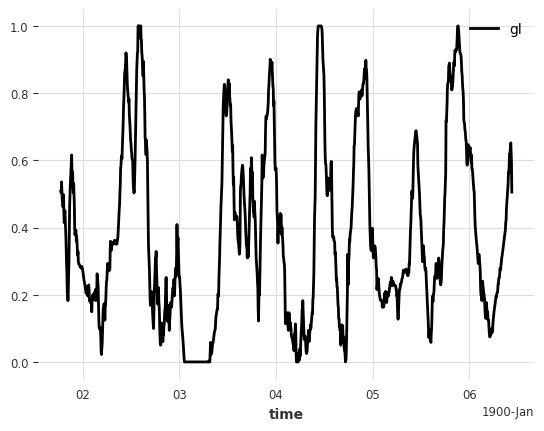

In [11]:
# target series (first contiguous segment)
series['train']['target'][0].plot()

In [12]:
# number of (contiguous) segments in the train data
len(series['train']['target'])

524

In [13]:
# static covariates are attached as attributes to the target series (first contiguous segment)
series['train']['target'][0].static_covariates

static_covariates    Height    Weight  Gender  Race  EduLevel  AnnualInc  \
component                                                                  
gl                 0.857143  0.521453     0.0   1.0  0.636364   0.714286   

static_covariates  MaritalStatus  DaysWkEx  DaysWkDrinkAlc  DaysMonBingeAlc  \
component                                                                     
gl                      0.285714  0.571429        0.133333              0.0   

static_covariates  ...  Coronary artery disease  \
component          ...                            
gl                 ...                      0.0   

static_covariates  Diabetic peripheral neuropathy  Dyslipidemia  \
component                                                         
gl                                            0.0           0.0   

static_covariates  Chronic kidney disease  Osteoporosis  \
component                                                 
gl                                    0.0           0.0   

static_covariates  Proliferative diabetic retinopathy  Hypercholesterolemia  \
component                                                                     
gl                                                0.0                   0.0   

static_covariates  Erectile dysfunction  Type I diabetes mellitus   id  
component                                                               
gl                                  0.0                       0.0  0.0  

[1 rows x 39 columns]

In [14]:
# instatiate Dataset object (performs sampling of input-output pairs)
dataset_train = SamplingDatasetPast(series['train']['target'],
                                    series['train']['dynamic'],
                                    output_chunk_length=formatter.params['length_pred'], # 12 pointss
                                    input_chunk_length=formatter.params['gluformer']['in_len'], # optimal number for Gluformer model
                                    use_static_covariates=True,
                                    max_samples_per_ts=100)  # limit number of samples per (contiguous) segment,)

In [15]:
# examine one (the sfirst) sample
dataset_train[0] # tuple of past target series, (past) covariates, static_covariates, future target series (to be predicted)

(array([[0.6049724 ],
        [0.59116024],
        [0.58563536],
        [0.5635359 ],
        [0.52762437],
        [0.50000006],
        [0.4944752 ],
        [0.5138122 ],
        [0.53867406],
        [0.54696137],
        [0.5331492 ],
        [0.5165746 ],
        [0.51104975],
        [0.51104975],
        [0.51104975],
        [0.5165746 ],
        [0.54696137],
        [0.5883978 ],
        [0.5966851 ],
        [0.54696137],
        [0.46408844],
        [0.4005525 ],
        [0.3729282 ],
        [0.37016577],
        [0.3729282 ],
        [0.3729282 ],
        [0.36187845],
        [0.35911602],
        [0.35635358],
        [0.32044202],
        [0.32596684],
        [0.3038674 ],
        [0.27900553],
        [0.24309392],
        [0.2486188 ],
        [0.22099449],
        [0.22099449],
        [0.19060774],
        [0.16850828],
        [0.16298343],
        [0.12983425],
        [0.12983425],
        [0.10497238],
        [0.10773481],
        [0.09392264],
        [0

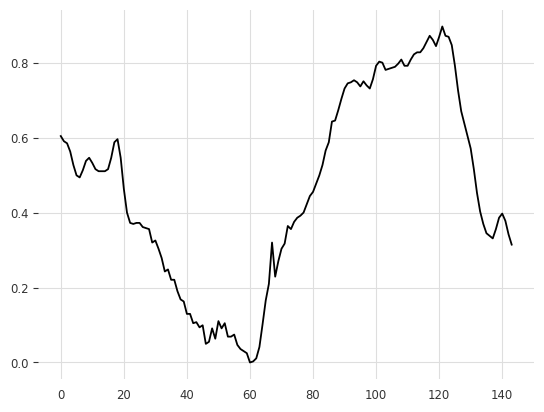

In [16]:
plt.plot(dataset_train[0][0]) # target series (past, input to the model) for the first sample

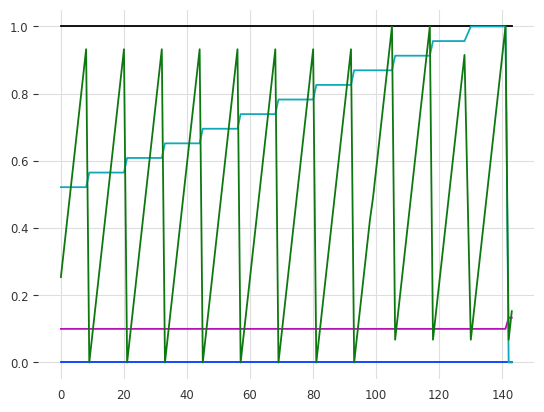

In [17]:
# past covariates (input to the model) for the first sample
# for Weinstock, these covariates are derived from the date
plt.plot(dataset_train[0][1])

In [18]:
# static covariates 
dataset_train[0][2].shape

(1, 39)

## Using Darts models

Since our dataset defintion re-uses logic and code from the Darts library, it is easy to use Darts models. We provide an example below.

In [33]:
from darts.models import NHiTSModel # this is a PastCovariates model
from utils.darts_processing import load_data
# NHiTS model does not accept static covariates, so we need to remove them
dataset = 'hall' # smaller dataset
formatter, series, scalers = load_data(seed=0,
                                       dataset=dataset,
                                       use_covs=True, 
                                       cov_type='past',
                                       use_static_covs=False) # not attached to the target series
    

--------------------------------
Loading column definition...
Checking column definition...
Loading data...
Dropping columns / rows...
Checking for NA values...
Setting data types...
Dropping columns / rows...
Encoding data...
	Updated column definition:
		id: REAL_VALUED (ID)
		time: DATE (TIME)
		gl: REAL_VALUED (TARGET)
		Age: REAL_VALUED (STATIC_INPUT)
		BMI: REAL_VALUED (STATIC_INPUT)
		A1C: REAL_VALUED (STATIC_INPUT)
		FBG: REAL_VALUED (STATIC_INPUT)
		ogtt.2hr: REAL_VALUED (STATIC_INPUT)
		insulin: REAL_VALUED (STATIC_INPUT)
		hs.CRP: REAL_VALUED (STATIC_INPUT)
		Tchol: REAL_VALUED (STATIC_INPUT)
		Trg: REAL_VALUED (STATIC_INPUT)
		HDL: REAL_VALUED (STATIC_INPUT)
		LDL: REAL_VALUED (STATIC_INPUT)
		mean_glucose: REAL_VALUED (STATIC_INPUT)
		sd_glucose: REAL_VALUED (STATIC_INPUT)
		range_glucose: REAL_VALUED (STATIC_INPUT)
		min_glucose: REAL_VALUED (STATIC_INPUT)
		max_glucose: REAL_VALUED (STATIC_INPUT)
		quartile.25_glucose: REAL_VALUED (STATIC_INPUT)
		median_glucose: REAL_VA

In [34]:
from utils.darts_dataset import SamplingDatasetPast
dataset_train = SamplingDatasetPast(series['train']['target'],
                                    series['train']['dynamic'],
                                    output_chunk_length=formatter.params['length_pred'], # 12 points
                                    input_chunk_length=formatter.params['nhits']['in_len'],
                                    use_static_covariates=False, # also ensures that there are no static covariates supplied to the model
                                    max_samples_per_ts=100)  # limit number of samples per (contiguous) segment,)        

In [35]:
# define model
from torch.optim.lr_scheduler import StepLR
model = NHiTSModel(input_chunk_length=formatter.params['nhits']['in_len'], 
                   output_chunk_length=formatter.params['length_pred'],
                   num_stacks=3, 
                   num_blocks=1, 
                   num_layers=2, 
                   layer_widths=512, 
                   activation='ReLU',
                   pooling_kernel_sizes=[[8], [4], [1]],
                   dropout=formatter.params['nhits']['dropout'],
                   optimizer_kwargs = {'lr': formatter.params['nhits']['lr']},
                   lr_scheduler_cls = StepLR,
                   lr_scheduler_kwargs = {'step_size': formatter.params['nhits']['lr_epochs'], 'gamma': 0.5},
                   batch_size=formatter.params['nhits']['batch_size'])
                #    pl_trainer_kwargs={"accelerator": "gpu", "devices": [1]})
# fit model
model.fit_from_dataset(dataset_train, verbose=True, epochs=10)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 2.2 M 
---------------------------------------------------
1.8 M     Trainable params
443 K     Non-trainable params
2.2 M     Total params
8.792     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


NHiTSModel(output_chunk_shift=0, num_stacks=3, num_blocks=1, num_layers=2, layer_widths=512, pooling_kernel_sizes=[[8], [4], [1]], n_freq_downsample=None, dropout=0.046869296882493555, activation=ReLU, MaxPool1d=True, input_chunk_length=144, output_chunk_length=12, optimizer_kwargs={'lr': 0.00011524084800602483}, lr_scheduler_cls=<class 'torch.optim.lr_scheduler.StepLR'>, lr_scheduler_kwargs={'step_size': 2, 'gamma': 0.5}, batch_size=48)

In [36]:
# define inference Dataset (conceals the future target from the model)
from utils.darts_dataset import SamplingDatasetInferencePast
test_dataset = SamplingDatasetInferencePast(target_series=series['test']['target'],
                                            covariates=series['test']['dynamic'],
                                            n=formatter.params['length_pred'],
                                            input_chunk_length=formatter.params['nhits']['in_len'],
                                            output_chunk_length=formatter.params['length_pred'],
                                            use_static_covariates=True,
                                            max_samples_per_ts = None,
                                            array_output_only=False ) # test on all available samples
# extract predictions
forecasts = model.predict_from_dataset(n=formatter.params['length_pred'], 
                                       input_series_dataset=test_dataset,
                                       verbose=True)
# extract ground truth
trues = [test_dataset.evalsample(i) for i in range(len(test_dataset))]
# extract input series
inputs = [test_dataset[i][4] for i in range(len(test_dataset))]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [37]:
# inverse scale
forecasts = scalers['target'].inverse_transform(forecasts)
trues = scalers['target'].inverse_transform(trues)
inputs = scalers['target'].inverse_transform(inputs)

<Axes: xlabel='time'>

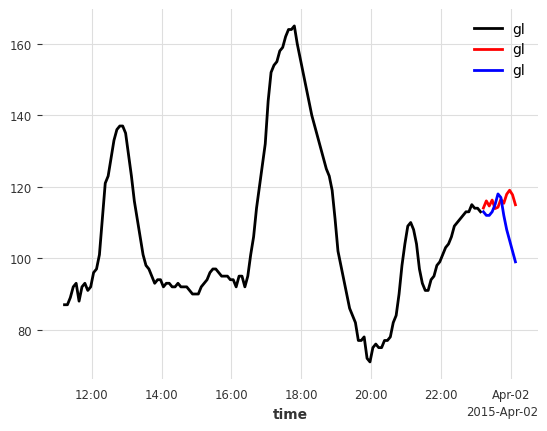

In [39]:
inputs[0].plot(color='black')
forecasts[0].plot(color='red')
trues[0].plot(color='blue')

## Using PyTorch models

Using custom PyTorch models is straightforward and mimics the workflow above for Darts models. See `fit()` function in `lib/gluformer/model.py` for an example. Below, we give an example of a simple 2-layer MLP model.

In [25]:
import numpy as np
import torch
import torch.nn as nn
from utils.darts_dataset import SamplingDatasetDual, SamplingDatasetInferenceDual

# define model
class MLP(nn.Module):
    def __init__(self, input_chunk_length, output_chunk_length):
        super(MLP, self).__init__()
        self.input_chunk_length = input_chunk_length
        self.output_chunk_length = output_chunk_length
        self.linear1 = nn.Linear(input_chunk_length, output_chunk_length)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(output_chunk_length, output_chunk_length)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x
    
    ############################################
    # Added for GluNet package
    ############################################
    
    def fit(self, 
            train_dataset: SamplingDatasetDual,
            learning_rate: float = 1e-3,
            batch_size: int = 32,
            epochs: int = 100,
            num_samples: int = 100,
            device: str = 'cpu'):
        # convert to dataset to dataloader
        train_loader = torch.utils.data.DataLoader(train_dataset, 
                                                   batch_size=batch_size,
                                                   shuffle=True,
                                                   drop_last=True)
        # define training criterion and optimizer
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=learning_rate, betas=(0.1, 0.9))
        self.to(device)
        # train model
        for epoch in range(epochs):
            for i, (past_target_series,  
                    future_target_series) in enumerate(train_loader):
                # zero out gradient
                optimizer.zero_grad()
                # forward pass
                past_target_series = past_target_series.squeeze().to(device)
                future_target_series = future_target_series.squeeze().to(device)
                pred = self(past_target_series)
                loss = criterion(pred, future_target_series)
                # backward pass
                loss.backward()
                optimizer.step()
            # print loss
            if epoch % 10 == 0:
                print(f'Epoch {epoch}, Loss {loss.item()}')
        return self
    

    def predict(self, test_dataset: SamplingDatasetInferenceDual, 
                batch_size: int = 32,
                device: str = 'cuda'):
        # define data loader
        test_loader = torch.utils.data.DataLoader(test_dataset,
                                                batch_size=batch_size,
                                                shuffle=False,
                                                drop_last=False)
        # test mode
        self.eval()
        self.to(device)
        predictions = []
        for i, past_target_series in enumerate(test_loader):
                # forward pass
                past_target_series = past_target_series[0].squeeze().to(device)
                pred = self(past_target_series)
                pred = pred.cpu().detach().numpy()
                predictions.append(pred)
        predictions = np.concatenate(predictions, axis=0)
        return predictions

In [26]:
model = MLP(input_chunk_length=36, 
            output_chunk_length=12)

dataset_train = SamplingDatasetDual(series['train']['target'],
                                    output_chunk_length=12,
                                    input_chunk_length=36,
                                    use_static_covariates=False,
                                    max_samples_per_ts=100,
                                    remove_nan=True)
dataset_test = SamplingDatasetInferenceDual(series['test']['target'],
                                            output_chunk_length=12,
                                            input_chunk_length=36,
                                            use_static_covariates=False,
                                            array_output_only=True)

model.fit(train_dataset=dataset_train,
          learning_rate=1e-3,
          batch_size=32,
          epochs=20,
          num_samples=100)

Epoch 0, Loss 0.006386989261955023
Epoch 10, Loss 0.008738845586776733


MLP(
  (linear1): Linear(in_features=36, out_features=12, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=12, out_features=12, bias=True)
)

In [27]:
preds = model.predict(test_dataset=dataset_test,
                        batch_size=32,
                        device='cpu')
trues = np.array([dataset_test.evalsample(i).values() for i in range(len(dataset_test))])
inputs = np.array([dataset_test[i][0].squeeze() for i in range(len(dataset_test))])

In [28]:
# inverse scale: by hand because Scaler works only with Darts TimeSeries objects
trues = (trues - scalers['target'].min_) / scalers['target'].scale_
preds = (preds - scalers['target'].min_) / scalers['target'].scale_
inputs = (inputs - scalers['target'].min_) / scalers['target'].scale_

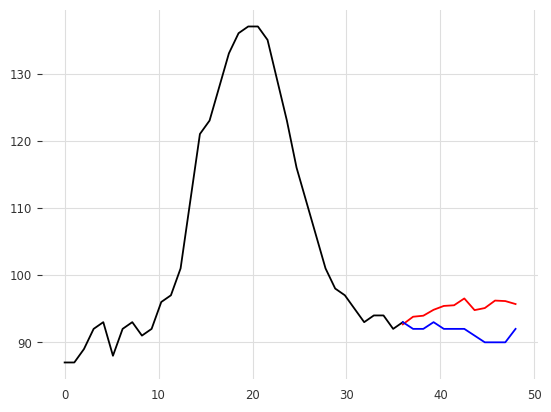

In [29]:
# plot inputs, predictions, and ground truth
import matplotlib.pyplot as plt
plt.plot(np.linspace(0, len(inputs[0]), len(inputs[0])), inputs[0].squeeze())
plt.plot(np.linspace(len(inputs[0]), len(inputs[0]) + len(preds[0]), len(preds[0])), preds[0], color='red')
plt.plot(np.linspace(len(inputs[0]), len(inputs[0]) + len(trues[0]), len(trues[0])), trues[0], color='blue')